# Step 1: Import required libraries..

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Step 2: Importing Dataset & Data preprocessing

In [2]:
dataset = pd.read_csv('zoo.csv')

In [3]:
dataset.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# Checking for null values..& datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [13]:
# checking unique values from each column..
for column in dataset.columns[1:]:
    print(dataset[column].unique())

[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[4 0 2 6 8 5]
[0 1]
[0 1]
[1 0]
[1 4 2 7 6 5 3]


In [14]:
# creating dataset copy..

dataset1 = dataset.copy()

In [15]:
# removing animal name column from dataset.

dataset1 = dataset1.drop(['animal name'], axis=1)

In [18]:
dataset1.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

 ## Seperating Depedent & Independent variables

In [21]:
x = dataset1.drop('type', axis=1)

In [23]:
x.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [24]:
y = pd.DataFrame(dataset1['type'])
y.head()

,type
0,1
1,1
2,4
3,1
4,1


# Step 3: EDA

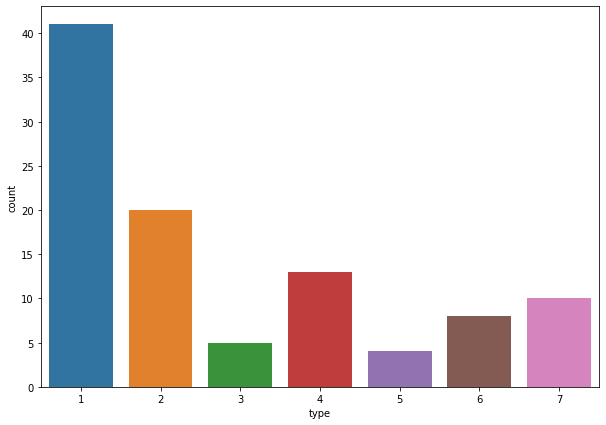

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='type', data = y)
plt.show()

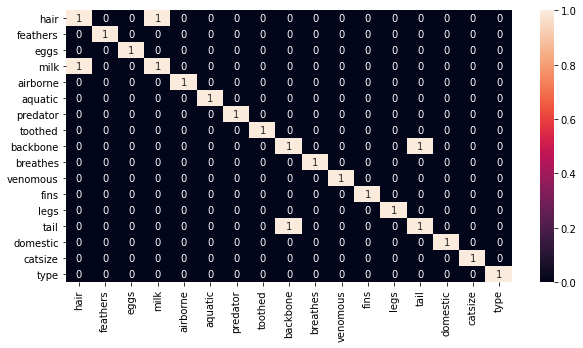

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr()>0.7, annot=True)
plt.show()

# Step 4: Splitting dataset into train & test..

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state =105)

# Step 6: Selcting Best K value

 ### Selcting best value for k
 ***

In [29]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i =  knn.predict(x_test)
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))

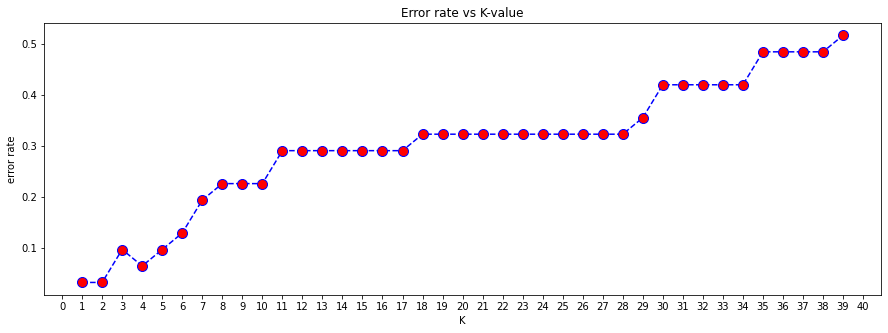

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
ax.plot(range(1,40), error_rate, color = 'blue', linestyle ='dashed', marker = 'o',\
        markerfacecolor = 'red', markersize = 10)

ax.set_xticks(np.arange(41))
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('error rate')
plt.show()

so it is found that K=2

# Step 7: Model Building

In [33]:
# Applying k=2

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
# predicting results for x_test

pred = KNN.predict(x_test)

# Step 8: Model Evalution..

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
# confusion matrix

print(confusion_matrix(y_test, pred))

[[13  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


In [37]:
%%time

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.95      0.97      0.95        31

Wall time: 22.1 ms


# Step 9: cross validation.

In [42]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(KNN, x, y, cv=5)
scores1

array([0.95238095, 0.85      , 0.95      , 0.85      , 0.95      ])